# Stock Price prediction

In [1]:
#using svm to predict stock
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
stock_prices = pd.read_csv(r'prices.csv')
symbols = list(set(stock_prices['symbol']))

In [2]:
msft_prices = stock_prices[stock_prices['symbol']== 'MSFT']
msft_prices = msft_prices[['date','open','low','high','close','volume']]
msft_prices.to_csv('msft_prices.csv',sep='\t')
msft_dates = [pd.Timestamp(date) for date in msft_prices['date']]

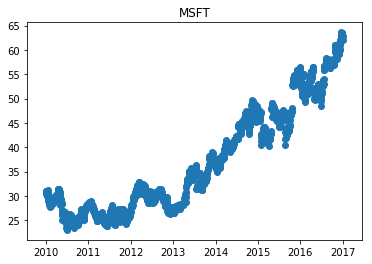

In [3]:
msft_close = np.array(msft_prices['close'],dtype='float')
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('MSFT')
plt.scatter(msft_dates,msft_close)
plt.show()

In [4]:
msft_prices = msft_prices.set_index('date')
print(msft_prices)

                 open        low       high      close       volume
date                                                               
2010-01-04  30.620001  30.590000  31.100000  30.950001   38409100.0
2010-01-05  30.850000  30.639999  31.100000  30.959999   49749600.0
2010-01-06  30.879999  30.520000  31.080000  30.770000   58182400.0
2010-01-07  30.629999  30.190001  30.700001  30.450001   50559700.0
2010-01-08  30.280001  30.240000  30.879999  30.660000   51197400.0
2010-01-11  30.709999  30.120001  30.760000  30.270000   68754700.0
2010-01-12  30.150000  29.910000  30.400000  30.070000   65912100.0
2010-01-13  30.260000  30.010000  30.520000  30.350000   51863500.0
2010-01-14  30.309999  30.260000  31.100000  30.959999   63228100.0
2010-01-15  31.080000  30.709999  31.240000  30.860001   79913200.0
2010-01-19  30.750000  30.680000  31.240000  31.100000   46575700.0
2010-01-20  30.809999  30.309999  30.940001  30.590000   54849500.0
2010-01-21  30.610001  30.000000  30.719999  30.

In [5]:
def get_x_and_y(price,window_length= 7,predict_day_length=1):
    '''get train and test set
    every time get window from price and
    '''
    m = len(price.iloc[0])
    n = len(price) - window_length
    m = window_length * m

    x = np.ones((n,m))
    y = np.ones((n,1))
    for i in range(len(price)-window_length):
        ans = [list(price.iloc[j] for j in range(i,i+window_length))]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
totalResults = []

def train_and_test(price,window_length,accurarys,reports):
    x,y = get_x_and_y(msft_prices,window_length=window_length)
    y = y.flatten()
    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(x)
    algorithms = ['SVM', 'RF', 'KNN', 'NB', 'MLP']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=233)
    for al in algorithms:
        if al == 'SVM':
            for kernel_arg in ['rbf','poly','linear']:
                clf = svm.SVC(kernel=kernel_arg,max_iter=5000)
                clf.fit(x_train,y_train)
                y_predict = clf.predict(x_test)
                accurary = clf.score(x_test,y_test)
                report = classification_report(y_test,y_predict,target_names = ['drop','up'])
                if window_length in accurarys:
                    accurarys[window_length].append(accurary)
                    reports[window_length].append(report)
                else: 
                    accurarys[window_length] = [accurary]
                    reports[window_length] = [report]
                print('The Accuracy of SVM Model : %f'%(clf.score(x_test,y_test)))
                print(report)
        if al == 'RF':
            clf_rf = RandomForestRegressor(n_estimators=5, random_state=0)
            clf_rf.fit(x_train, y_train)
            y_predict = clf_rf.predict(x_test)
            
            accurary = clf_rf.score(x_test,y_test)
            print('The Accuracy of Random Forest Model : %f'%(abs(clf_rf.score(x_test,y_test))))
            print(report)
        if al == 'KNN':
            clf_knn = KNeighborsClassifier(n_neighbors=100)
            clf_knn.fit(x_train, y_train)
            y_predict = clf_knn.predict(x_test)
            
            accurary = clf_knn.score(x_test,y_test)
            print('The Accuracy of K Nearest Neighbor : %f'%(abs(clf_knn.score(x_test,y_test))))
            print(report)
        if al == 'NB':
            clf_nb = GaussianNB()
            clf_nb.fit(x_train, y_train)
            y_predict = clf_nb.predict(x_test)
            
            accurary = clf_nb.score(x_test,y_test)
            print('The Accuracy of Naive Bayes model : %f'%(abs(clf_nb.score(x_test,y_test))))
            print(report)
        if al == 'MLP':
            clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
            clf_mlp.fit(x_train, y_train)
            y_predict = clf_mlp.predict(x_test)
            accurary = clf_mlp.score(x_test,y_test)
            print('The Accuracy of Softmax (MLP) : %f'%(abs(clf_mlp.score(x_test,y_test))))
            print(report)

In [7]:
window_lengths = [7,14,21,30,60,90,120,150,180]
accurarys = {}
reports ={}
train_and_test(msft_prices,30,accurarys,reports)

C:\Users\nit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined

The Accuracy of SVM Model : 0.450346
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       238
          up       0.45      1.00      0.62       195

   micro avg       0.45      0.45      0.45       433
   macro avg       0.23      0.50      0.31       433
weighted avg       0.20      0.45      0.28       433

The Accuracy of SVM Model : 0.450346
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       238
          up       0.45      1.00      0.62       195

   micro avg       0.45      0.45      0.45       433
   macro avg       0.23      0.50      0.31       433
weighted avg       0.20      0.45      0.28       433



C:\Users\nit\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Accuracy of SVM Model : 0.461894
              precision    recall  f1-score   support

        drop       0.52      0.24      0.32       238
          up       0.44      0.74      0.55       195

   micro avg       0.46      0.46      0.46       433
   macro avg       0.48      0.49      0.44       433
weighted avg       0.49      0.46      0.43       433

The Accuracy of Random Forest Model : 0.228933
              precision    recall  f1-score   support

        drop       0.52      0.24      0.32       238
          up       0.44      0.74      0.55       195

   micro avg       0.46      0.46      0.46       433
   macro avg       0.48      0.49      0.44       433
weighted avg       0.49      0.46      0.43       433

The Accuracy of K Nearest Neighbor : 0.491917
              precision    recall  f1-score   support

        drop       0.52      0.24      0.32       238
          up       0.44      0.74      0.55       195

   micro avg       0.46      0.46      0.46       43